<a href="https://colab.research.google.com/github/amoghpai17/Cardiovascular_Risk_prediction/blob/main/Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** Amogh Pai


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/amoghpai17/Cardiovascular_Risk_prediction

# **Problem Statement**


**Write Problem Statement Here.**

# Business context

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [86]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [87]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cardiovascular_Risk_prediction/data_cardiovascular_risk.csv')

### Dataset First View

In [89]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [90]:
# Dataset Rows & Columns count
rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 3390 rows and 17 columns.


### Dataset Information

In [91]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [92]:
# Dataset Duplicate Value Count
mask = df.duplicated()
duplicate_count = mask.sum()
print(f'The dataset has {duplicate_count} duplicate rows.')

The dataset has 0 duplicate rows.


#### Missing Values/Null Values

In [93]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [94]:
df.isnull().values.sum()

510

<AxesSubplot:>

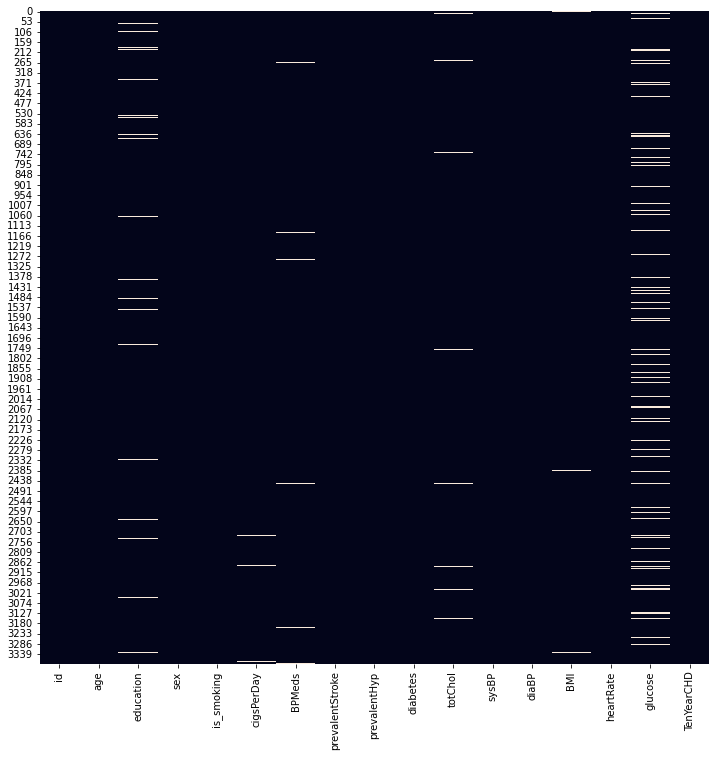

In [95]:
# Visualizing the missing values
plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains 3390 rows and 17 columns.

The dataset has 510 null values and no Duplicate values.

The datatypes of features are object,int and float.

## ***2. Understanding Your Variables***

In [96]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [97]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

**Sex - Gender**

**Age- Age**

**is_smoking - whether smoking currently or not.** 

**cigs_Per_Day - Cigarettes smoked per day.**

**BP_Meds - Whether taking BP meds or not.** 
       
**prevalent Stroke - If the patient has a history of stroke**

**prevalent Hyp - If the patient has a history of hypertension**

**diabetes - Patient has diabetes or not**

**tot Chol - Cholesterol measure**

**sysBP - BP measure**
       
**diaBP - BP measure**

**BMI - Body Mass Index**

**heartRate - Heart Rate measure**



### Check Unique Values for each variable.

In [98]:
# Check Unique Values for each variable.
for col in df.columns:
    unique_values = df[col].nunique()
    print(col, unique_values)

id 3390
age 39
education 4
sex 2
is_smoking 2
cigsPerDay 32
BPMeds 2
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 240
sysBP 226
diaBP 142
BMI 1259
heartRate 68
glucose 132
TenYearCHD 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [99]:
# Write your code to make your dataset analysis ready.
# Creating the list of variables for which distribution plot needs to be plotted
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [100]:
#dropping the variables which are insignificant
df.drop(labels=['id','education'],inplace=True,axis=1)

In [101]:
#required for visualization purpose
df0=df.iloc[:,1:3]
df0['smoking']=df0['is_smoking'].apply (lambda x:0 if x=='NO' else 1 )
df_smoke=df0.groupby(['sex','is_smoking']).count()
df_smoke=df_smoke.reset_index()
df_smoke

,sex,is_smoking,smoking
0,F,NO,1147
1,F,YES,776
2,M,NO,556
3,M,YES,911


In [151]:
#required for visualization purpose
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [152]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

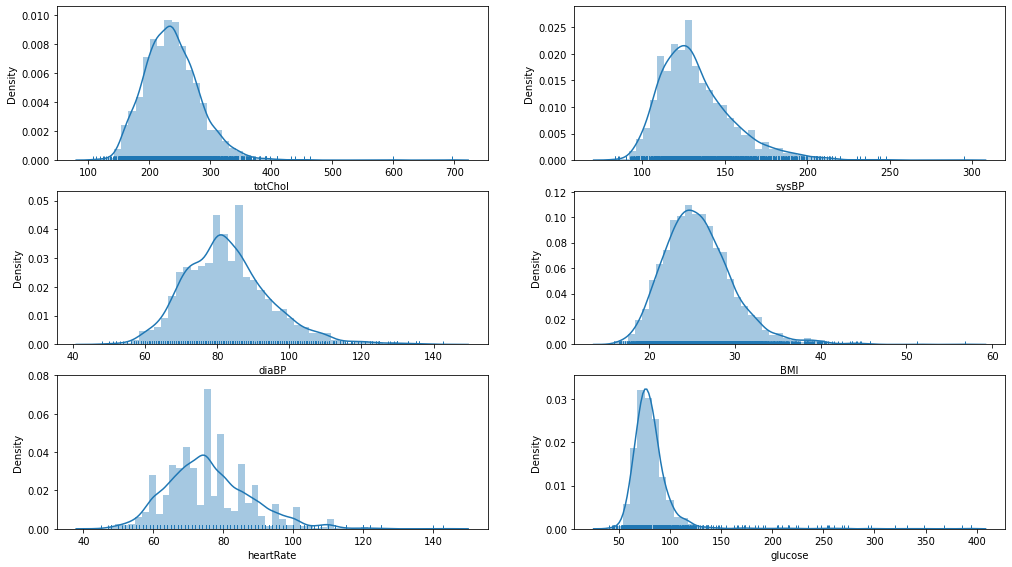

In [102]:
# Chart - 1 visualization code
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
    plt.subplot(4,2,i+1)
    sns.distplot(df[dist_col[i]], hist=True, rug=True)

##### 1. Why did you pick the specific chart?

A distribution plot, also known as a histogram, is a useful chart for exploring the distribution of a single variable. It displays the frequency of data points that fall within a set of equal ranges, or "bins." This can help reveal patterns in the data such as the presence of outliers, skewness, and the presence of multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

The values are distributed symmetrically around the mean, with most of the values clustered around the mean and fewer values farther away from it. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the probability distribution can help a business make informed decisions about risk management, forecasting, and resource allocation. if the chart reveals a highly skewed distribution, it could indicate that the data is not representative of the population or that there are systemic issues that need to be addressed. 



#### Chart - 2

Text(0.5, 1.0, 'Count of people who have risk of CHD based on gender')

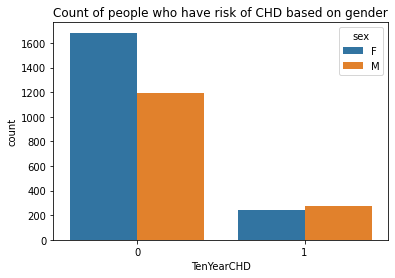

In [104]:
# Chart - 3 visualization code
# Count plot
sns.countplot(x='TenYearCHD',data=df,hue='sex')
plt.title('Count of people who have risk of CHD based on gender')

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Male has higher risk of CHD as compared to Female. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that males have a higher risk of CHD than females may not necessarily lead to a positive business impact, depending on the nature of the business. If the business is in the healthcare industry, such as a hospital or health insurance provider, this insight could lead to a positive impact by helping them target their resources towards men and create programs to prevent or manage CHD in men.

#### Chart - 3

Text(0.5, 1.0, 'Plot of people who smoke based on gender')

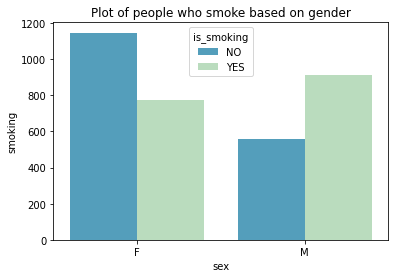

In [105]:
# Plot to see people who smoke more based on gender
sns.barplot(x="sex",
           y="smoking",
           hue="is_smoking",
           data=df_smoke,palette='GnBu_r')
plt.title('Plot of people who smoke based on gender')

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Male patients smoke more compared to female patients in the given dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could potentially lead to negative growth if it is used to perpetuate harmful gender stereotypes or biases. For example, if a business were to use this insight to assume that all male employees smoke or are more likely to take smoking breaks, it could lead to discriminatory practices in the workplace that could harm morale and productivity.

Overall, it is important to use insights such as these in a responsible and ethical manner, and to consider their potential impact on different aspects of the business. While this particular insight may not directly lead to positive business impact in all cases, it can be used in conjunction with other data to develop effective strategies for promoting health and wellness.

#### Chart - 4

Text(0.5, 1.0, 'Plot of people who have Risk of heart rate based on age')

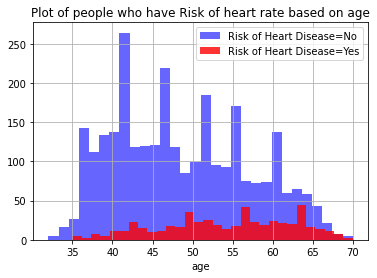

In [106]:
# Chart - 5 visualization code
#  Histogram Plot
df[df['TenYearCHD']==0]['age'].hist(bins=30,color='blue',label='Risk of Heart Disease=No',alpha=0.6)
df[df['TenYearCHD']==1]['age'].hist(bins=30,color='red',label='Risk of Heart Disease=Yes',alpha=0.8)
plt.legend()
plt.xlabel('age')
plt.title('Plot of people who have Risk of heart rate based on age')


##### 1. Why did you pick the specific chart?

It is a useful chart for exploring the distribution of a single variable. It displays the frequency of data points that fall within a set of equal ranges, or "bins." This can help reveal patterns in the data such as the presence of outliers, skewness, and the presence of multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

The risk of heart disease is more between the age 48 to 63. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the risk of heart disease is higher between the ages of 48 to 63 could potentially have a positive business impact if the business is in the healthcare or wellness industry. For example, a health insurance company could use this information to create targeted marketing campaigns to individuals in this age group to encourage them to get regular check-ups, exercise regularly, and eat a healthy diet to reduce their risk of heart disease. This could lead to an increase in demand for healthcare services and products, which could have a positive impact on businesses in the healthcare industry.



#### Chart - 5

Text(0.5, 1.0, 'Plot of BP against Cholestrol')

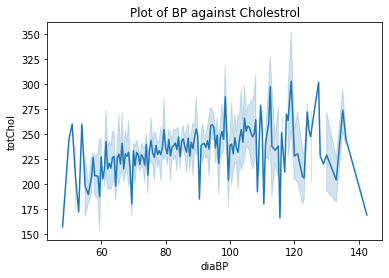

In [107]:
# Chart - 6 visualization code
sns.lineplot(data=df,x=df['diaBP'],y=df['totChol'])
plt.title('Plot of BP against Cholestrol')

##### 1. Why did you pick the specific chart?

A line plot can be a useful chart type for visualizing the relationship between two continuous variables like BP and cholesterol. By plotting each data point as a single point on the chart and connecting them with a line, a line plot can help show the overall trend in the data and identify any patterns or changes over time.

##### 2. What is/are the insight(s) found from the chart?

The graph  indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is possible that the insights could have a negative impact on the sales of cholesterol-lowering medications or devices, as the importance of cholesterol levels in predicting coronary heart disease may be less emphasized. However, it's important to note that these medications and devices may still be valuable in managing other health conditions related to cholesterol levels, such as high LDL cholesterol or familial hypercholesterolemia. Additionally, new treatments may be developed to target other risk factors identified through the more comprehensive risk assessment tools. Overall, the impact on business growth is difficult to predict and will likely depend on a range of factors.

#### Chart - 6

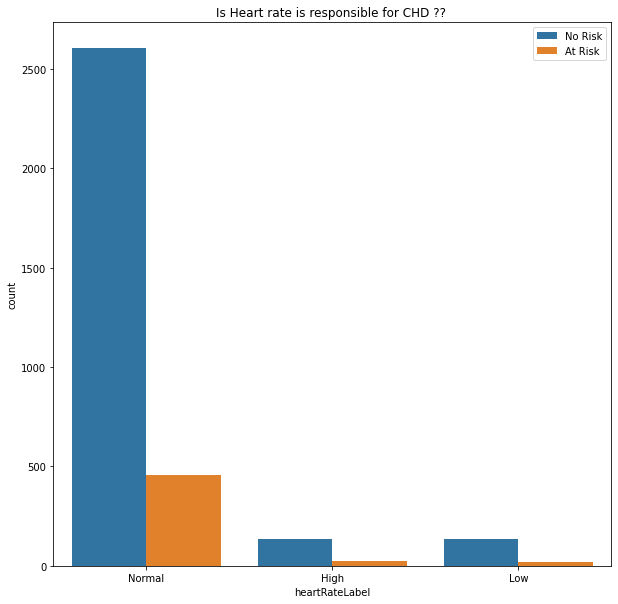

In [154]:
# Chart - 7 visualization code
plt.figure(figsize = (10,10))
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'])
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

people with more then 60 and less then 100 heart rate has higher chance of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the business is in the healthcare industry, this insight could potentially have a positive impact by allowing healthcare professionals to identify patients who are at higher risk for CHD and provide them with appropriate treatment and preventive measures to reduce their risk. If the business is in the fitness industry, this insight could potentially have a negative impact if it discourages people from exercising or pushing themselves too hard during exercise out of fear of increasing their heart rate. This could lead to a decrease in demand for fitness products or services and ultimately lead to negative growth. 

#### Chart - 7

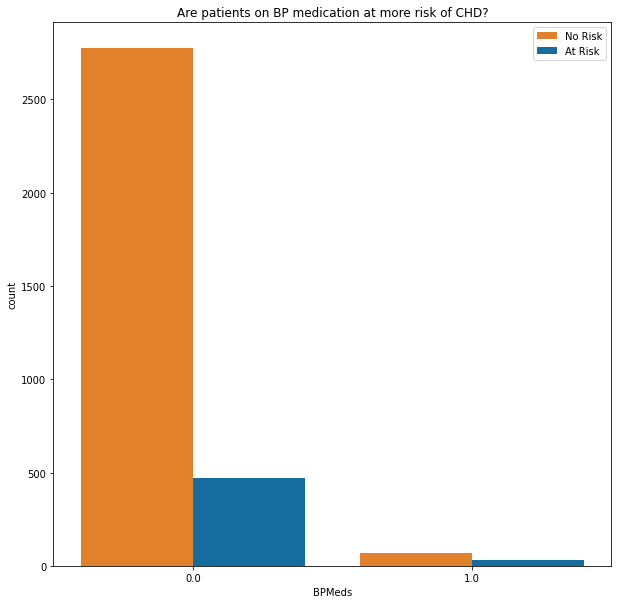

In [109]:
# Chart - 8 visualization code

my_palette = {0: '#ff7f0e', 1: '#0072b2'}
plt.figure(figsize=(10, 10))
sns.countplot(x=df['BPMeds'], hue=df['TenYearCHD'], palette=my_palette)
plt.title("Are patients on BP medication at more risk of CHD?")
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Easy to interpret: A bar chart is a simple and intuitive way to represent categorical data. The height of the bars provides an easy-to-understand visual representation of the data.

Effective comparison: A bar chart allows for easy comparison between different categories, in this case, different states. This can help identify patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

people with no BP medication are at more risk for CHD then people with BP medication. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that people with no BP medication are at more risk for CHD than people with BP medication can potentially lead to a positive business impact for companies that develop and market BP medication. These companies may see an increase in demand for their products, resulting in increased revenue and growth.



#### Chart - 8 - Correlation Heatmap

<AxesSubplot:>

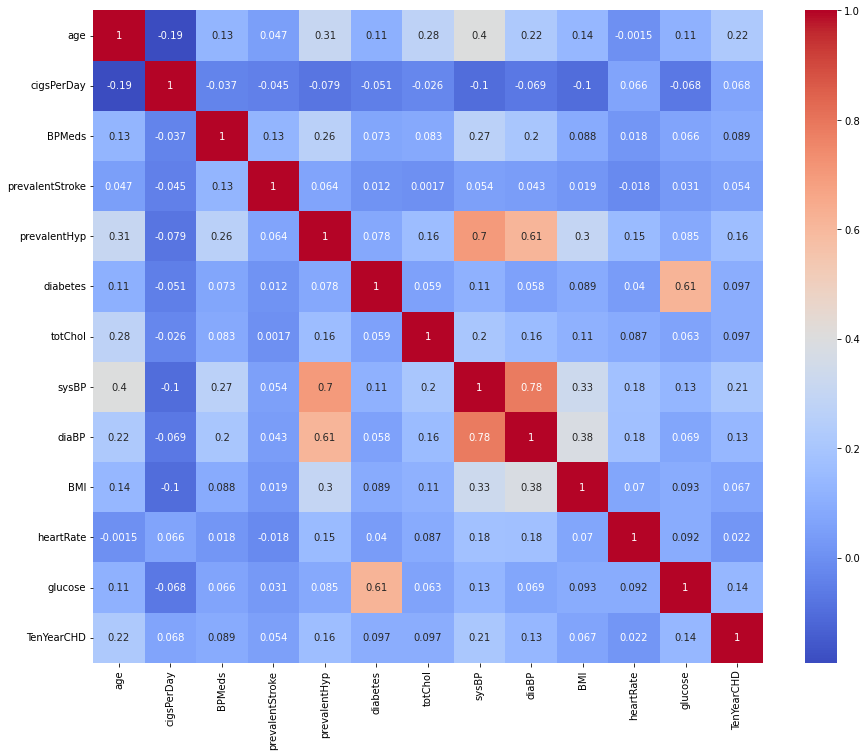

In [155]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps help people identify which variables in a dataset are strongly or weakly correlated. By looking at the color-coded matrix, they can quickly identify which variables are positively or negatively correlated and to what degree.

##### 2. What is/are the insight(s) found from the chart?

diabetes and gulucose is positively correlated. sysBP and diaBP is also have positive correlation. 

#### Chart - 9 - Pair Plot 

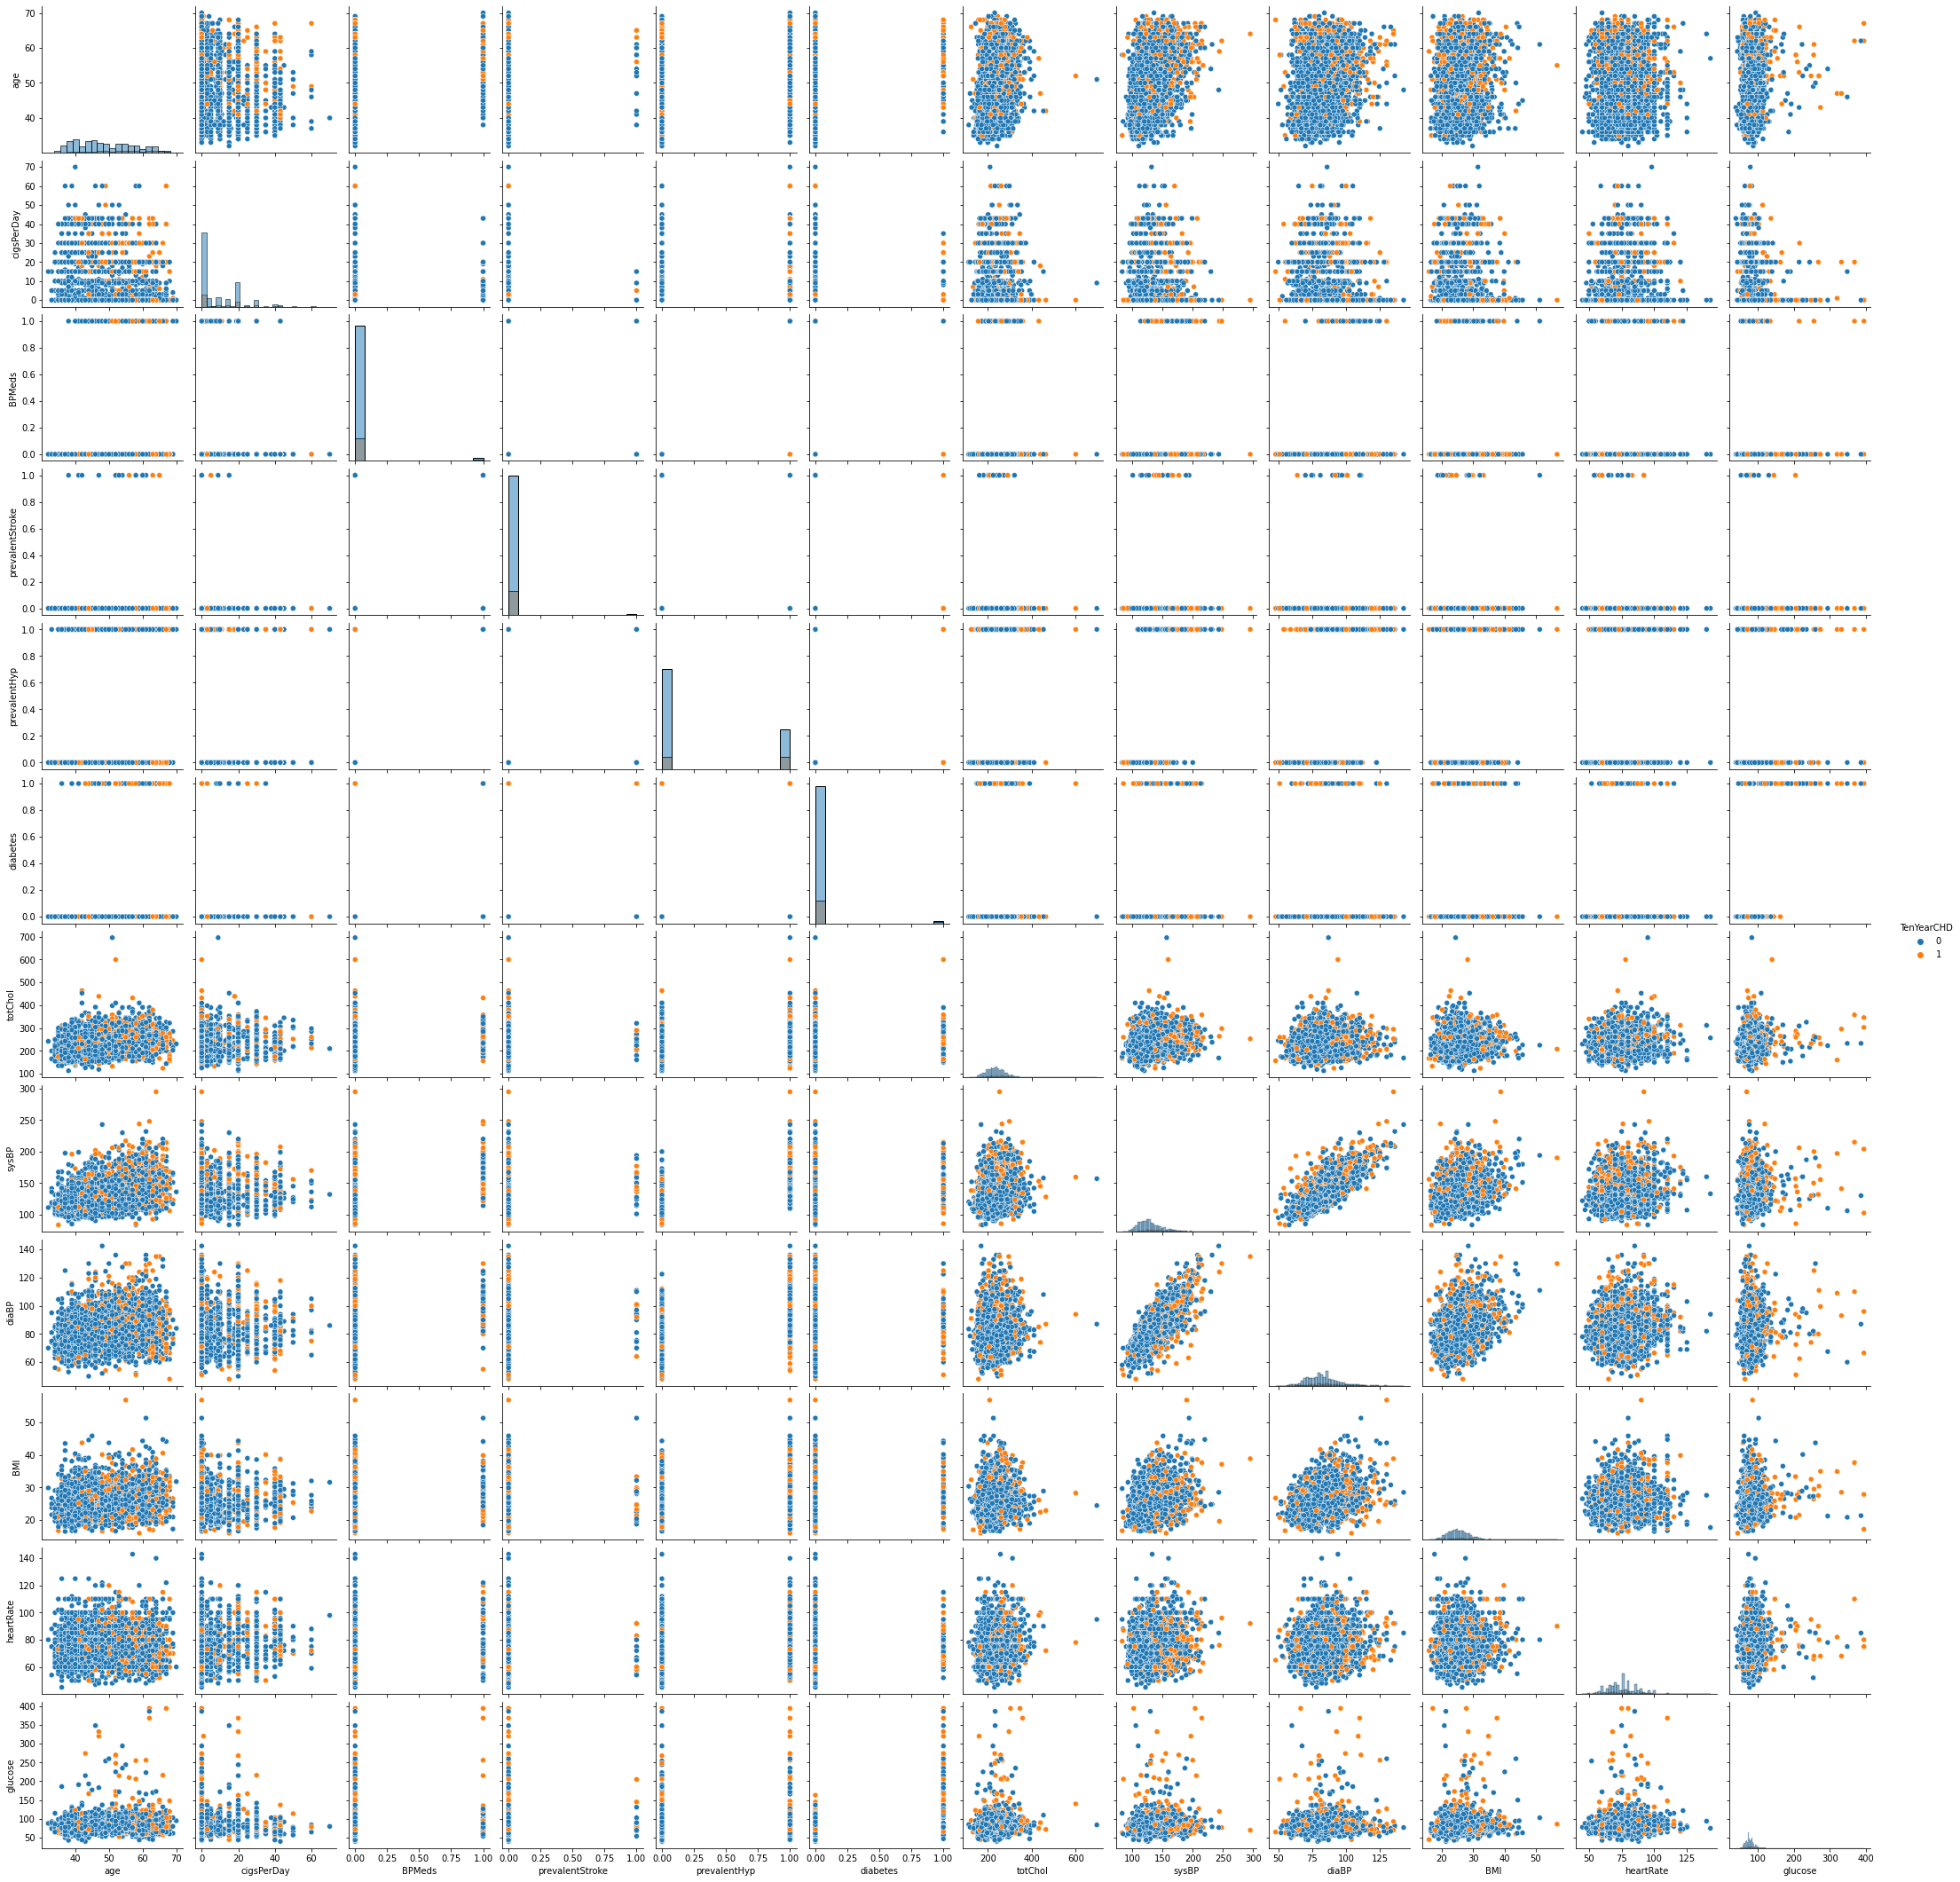

In [158]:
# Pair Plot visualization code
sns.pairplot(df, hue='TenYearCHD', diag_kind='hist')

##### 1. Why did you pick the specific chart?

Pairplots can help identify correlations between different variables in a dataset. Correlated variables are plotted close together on the diagonal of the pairplot, and can indicate a positive or negative correlation between the variables.

Pairplots are a useful way to visualize high-dimensional data by reducing the dimensionality of the data to two dimensions. This can make it easier to identify patterns and relationships between variables in the data.

##### 2. What is/are the insight(s) found from the chart?


diabetes and gulucose is positively correlated. sysBP and diaBP is also have positive correlation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: There is a significant difference in the average age between individuals who develop cardiovascular disease (CHD) and those who do not.

Statement 2: There is a significant association between smoking and the development of cardiovascular disease.

Statement 3: There is a positive correlation between BMI and systolic blood pressure.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in the average age between individuals who develop CHD and those who do not.

Alternative hypothesis: There is a significant difference in the average age between individuals who develop CHD and those who do not.

#### 2. Perform an appropriate statistical test.

In [117]:
# Perform Statistical Test to obtain P-Value
chd_age = df[df['TenYearCHD'] == 1]['age']
no_chd_age = df[df['TenYearCHD'] == 0]['age']
t_stat, p_val = ttest_ind(chd_age, no_chd_age, equal_var=False)

if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Two-sample t-test assuming unequal variances

##### Why did you choose the specific statistical test?

 This test is appropriate because we are comparing the means of two independent groups (individuals who develop CHD and those who do not), and we do not know the population variances of the two groups.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant association between smoking and the development of cardiovascular disease.

Alternative hypothesis: There is a significant association between smoking and the development of cardiovascular disease.

#### 2. Perform an appropriate statistical test.

In [118]:
# Perform Statistical Test to obtain P-Value
smoking_chd = pd.crosstab(df['is_smoking'], df['TenYearCHD'])
chi2_stat, p_val, dof, expected = chi2_contingency(smoking_chd)

if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

Accept null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Chi-square test.

##### Why did you choose the specific statistical test?

This test is appropriate because we are testing for independence between two categorical variables (smoking and the development of CHD).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no correlation between BMI and systolic blood pressure.

Alternative hypothesis: There is a positive correlation between BMI and systolic blood pressure.

#### 2. Perform an appropriate statistical test.

In [119]:
# Perform Statistical Test to obtain P-Value
df.replace([np.inf, -np.inf], np.nan, inplace=True) # replace infinite values with NaN
df.dropna(subset=['BMI', 'sysBP'], inplace=True) # remove rows with missing values

corr_coef, p_val = pearsonr(df['BMI'], df['sysBP'])

if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Accept null hypothesis.")

Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have used Pearson correlation coefficient test.

##### Why did you choose the specific statistical test?

This test is appropriate because we are testing the strength of the linear relationship between two continuous variables (BMI and systolic blood pressure) and whether the correlation is positive or not.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [120]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [121]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [122]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [123]:
# Expand Contraction

#### 2. Lower Casing

In [124]:
# Lower Casing

#### 3. Removing Punctuations

In [125]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [126]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [127]:
# Remove Stopwords

In [128]:
# Remove White spaces

#### 6. Rephrase Text

In [129]:
# Rephrase Text

#### 7. Tokenization

In [130]:
# Tokenization

#### 8. Text Normalization

In [131]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [132]:
# POS Taging

#### 10. Text Vectorization

In [133]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [134]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [135]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [136]:
# Transform Your data

### 6. Data Scaling

In [137]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [138]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [139]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [140]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [141]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [142]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [143]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [144]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [145]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [146]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [147]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [148]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [149]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [150]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***